In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# prompt: change directory to current python notebooks on Google drive
import os
os.chdir('/content/drive/MyDrive/Courses/Ryerson/MRP/Dataset')

In [ ]:
df = pd.read_excel('ugo_manual_raw.xlsx', index_col=0)
train_labels = df['rating']
# test_datadf = pd.read_csv('drugLibTest_raw.tsv', sep='\t', index_col=0)
# test_labels = test_datadf['rating']

In [ ]:
train_datadf = df.copy()
train_datadf.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,benefitsArray,sideEffectsReview,sideArray,commentsReview,dosageArray
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...","monitor blood pressure , weight and asses for ..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,Although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest...","I Hate This Birth Control, I Would Not Suggest..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,I was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,"Heavy bleeding, excess clotting",I took 2 pills at the onset of my menstrual cr...,I took 2 pills at the onset of my menstrual cr...
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,The acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...","Constipation, dry mouth, mild dizziness",I was given Prilosec prescription at a dose of...,I was given Prilosec prescription at a dose of...
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,I think that the Lyrica was starting to help w...,i felt extremely drugged and dopey. could not...,extremely drugged and dopey. extreme ankle and...,See above,See above


1. Preprocessing the Text

*   Tokenization: Split text into individual words or phrases.
*   Lowercasing: Convert all text to lowercase to avoid duplicates (e.g., "Data" vs. "data").
*  Stopword Removal: Remove common stop words (e.g., "the," "is," "and") that don't add meaningful context.
*  Stemming/Lemmatization: Reduce words to their base or root form (e.g., "running" → "
*  Remove Punctuation/Numbers: Strip unnecessary symbols or digits that don't represent meaningful keywords.



In [ ]:
import string
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
train_datadf.loc[train_datadf['sideEffectsReview'] == np.nan, 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'] == 'nan', 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'] == 'None.', 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'] == 'none', 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'] == 'no', 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'] == '*', 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'] == '..', 'sideEffectsReview'] = 'None'
train_datadf.loc[train_datadf['sideEffectsReview'].isna(), 'sideEffectsReview'] = 'None'

In [ ]:
train_datadf.loc[train_datadf['sideArray'] == np.nan, 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'] == 'nan', 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'] == 'None.', 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'] == 'none', 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'] == 'no', 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'] == '*', 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'] == '..', 'sideArray'] = 'None'
train_datadf.loc[train_datadf['sideArray'].isna(), 'sideArray'] = 'None'

In [ ]:
train_datadf['effectiveness_label'] = train_datadf['effectiveness'].map({'Highly Effective': 4, 'Considerably Effective': 3, 'Moderately Effective': 2, 'Marginally Effective': 1, 'Ineffective': 0})

train_datadf['sideEffects_label'] = train_datadf['sideEffects'].map({'No Side Effects': 4, 'Mild Side Effects': 3, 'Moderate Side Effects': 2,'Severe Side Effects': 1, 'Extremely Severe Side Effects': 0})

In [ ]:
def preprocess(review):
  # print(review)
  if review == np.nan or review == 'nan' \
    or review == 'None.' or review == 'none' \
    or review == 'no' or review == '*' \
    or review == '..' or ((isinstance(review, int) or isinstance(review, float)) and np.isnan(review)):
    review = 'None'

  # print('review: ', review)

  if str(review) == 'nan':
    print('review: ', review)
    review = 'None'

  if not bool(re.search(r"[a-zA-Z0-9]", review)):
    print(review)
    review = 'None'

  review = review.lower()
  return review


df['sideEffectsReview'] = df['sideEffectsReview'].apply(preprocess)
df['benefitsReview'] = df['benefitsReview'].apply(preprocess)

**preprocess single tokens**

In [ ]:

def preprocess_single_tokens(df):
  # lowercase

  df['sideArray'] = df['sideArray'].astype(str).str.lower()
  sd_tokens = [nltk.word_tokenize(s) for s in df['sideArray']]
  # Stopword Removal: Remove common stop words (e.g., "the," "is," "and") that don't add meaningful context.
  # x_train = [lemmatizer.lemmatize(word) for word in sd_tokens if word not in stop_words and word not in string.punctuation]
  x_train = []
  for sentence in sd_tokens:
    # print('sentence: ', sentence)
    curr_train = []
    for word in sentence:
      if word not in stop_words and word not in string.punctuation:
        curr_train.append(lemmatizer.lemmatize(word))
    x_train.append(curr_train)
      # break
  return x_train
train_single_tokens = preprocess_single_tokens(train_datadf)

In [ ]:
train_datadf['sideArray'].iloc[300]

'trouble breathin, confusion, sleepiness, fatigue, depression'

In [ ]:
df[df['sideArray'] == np.nan]

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,benefitsArray,sideEffectsReview,sideArray,commentsReview,dosageArray


In [ ]:
import re



In [ ]:
text = "Price: 100.50 USD. Date: 2024.03.12"
new_text = re.sub(r"\.", ",", text)  # Replace all dots with commas

print(new_text)

Price: 100,50 USD, Date: 2024,03,12


In [ ]:
def preprocess_ngrams_tokens(df):
  df['sideArray'] = df['sideArray'].astype(str).str.lower()

  sd_tokens = []
  for sentence in df['sideArray']:
    curr_train = []


    for phrase in sentence.split(','):
      # print(phrase)
      new_text = re.sub(r"\.", ",", phrase)
      if len(phrase.split(' ')) > 1:
        if 'none' in phrase or 'nan' in phrase:
          phrase = 'none'
        new_sent = [lemmatizer.lemmatize(word) for word in phrase.split(' ') if word not in stop_words and word not in string.punctuation]
        new_sent = "_".join(new_sent)
        curr_train.append(new_sent)
      else:
        phrase = phrase.strip()
        curr_train.append(lemmatizer.lemmatize(phrase))
    sd_tokens.append(curr_train)
  return sd_tokens

train_ngram_tokens = preprocess_ngrams_tokens(train_datadf)

In [ ]:
len(train_ngram_tokens)
train_datadf['ngrams_tokens'] = train_ngram_tokens

In [ ]:
train_datadf.head(5)

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,benefitsArray,sideEffectsReview,sideArray,commentsReview,dosageArray,effectiveness_label,sideEffects_label,ngrams_tokens
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...","monitor blood pressure , weight and asses for ...",4,3,"[cough, hypotension, proteinuria, impotence, r..."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,although this type of birth control has more c...,Although this type of birth control has more c...,"heavy cycle, cramps, hot flashes, fatigue, lon...","heavy cycle, cramps, hot flashes, fatigue, lon...","I Hate This Birth Control, I Would Not Suggest...","I Hate This Birth Control, I Would Not Suggest...",4,1,"[heavy_cycle, cramp, hot_flash, fatigue, long_..."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,i was used to having cramps so badly that they...,I was used to having cramps so badly that they...,heavier bleeding and clotting than normal.,"heavy bleeding, excess clotting",I took 2 pills at the onset of my menstrual cr...,I took 2 pills at the onset of my menstrual cr...,4,4,"[heavy_bleeding, excess_clotting]"
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,the acid reflux went away for a few months aft...,The acid reflux went away for a few months aft...,"constipation, dry mouth and some mild dizzines...","constipation, dry mouth, mild dizziness",I was given Prilosec prescription at a dose of...,I was given Prilosec prescription at a dose of...,1,3,"[constipation, dry_mouth, mild_dizziness]"
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,i think that the lyrica was starting to help w...,I think that the Lyrica was starting to help w...,i felt extremely drugged and dopey. could not...,extremely drugged and dopey. extreme ankle and...,See above,See above,1,1,[extremely_drugged_dopey._extreme_ankle_foot_s...


In [ ]:
train_datadf.iloc[446]

,4023
urlDrugName,celexa
rating,8
effectiveness,Highly Effective
sideEffects,Moderate Side Effects
condition,depression/panic disorder
benefitsReview,"I'm only four days in, but I already feel more..."
benefitsArray,"I'm only four days in, but I already feel more..."
sideEffectsReview,"Nausea, Restless Leg Syndrome, dry mouth, teet..."
sideArray,"nausea, restless leg syndrome, dry mouth, teet..."
commentsReview,"With continue chemical therapy using Celexa, I..."


Train word embeddings using Word2Vec

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=train_ngram_tokens,
                 vector_size=100,
                 window=4,
                 epochs=10,
                 workers=4,
                 min_count=1)

In [ ]:
similar_words = model.wv.most_similar('nausea', topn=5)
print('similar_words: ', similar_words)

similar_words:  [('strange_nightmares._never_forget', 0.31963983178138733), ('difficulty_remembering', 0.2751837372779846), ('lightheadedness', 0.26512107253074646), ('sleepiness', 0.26030805706977844), ('severe_night_sweat', 0.24331361055374146)]


**Perform Analysis using NLTK**

In [ ]:
from nltk.probability import FreqDist

In [ ]:
all_side_effects = [x for xs in train_ngram_tokens for x in xs]

In [ ]:
# all_side_effects
fdist = FreqDist(all_side_effects)

In [ ]:
fdist.items()

dict_items([('cough', 2), ('hypotension', 1), ('proteinuria', 1), ('impotence', 1), ('renal_failure', 1), ('angina_pectoris', 1), ('tachycardia', 1), ('eosinophilic_pneumonitis', 1), ('taste_disturbance', 1), ('nausea_anorexia', 1), ('weakness', 2), ('fatigue', 16), ('insominca', 1), ('heavy_cycle', 1), ('cramp', 2), ('hot_flash', 2), ('long_lasting_cycle', 1), ('heavy_bleeding', 1), ('excess_clotting', 1), ('constipation', 18), ('dry_mouth', 29), ('mild_dizziness', 1), ('extremely_drugged_dopey._extreme_ankle_foot_swelling', 1), ('low_sex_drive', 5), ('tired', 20), ('nausea', 23), ('heavy_moodswings', 1), ('decreased_appetite', 3), ('short-term_memory.', 1), ('none', 140), ('check', 1), ('mild_yeast_infection', 1), ('lower_libido', 2), ('red_upper_eyelid', 1), ('itchy_upper_eyelid', 1), ('feeling', 1), ('depressed', 5), ('fatigued', 1), ('severe_blister_around_lips.', 1), ('withdrawal_symptom', 2), ('constricted_throat', 1), ('cause_moderate_withdrawal_symptom', 1), ('restless', 2), (

In [ ]:
side_effect_counts = pd.DataFrame(fdist.items(), columns=["Side Effect", "Frequency"])

In [ ]:
side_effect_counts.to_excel('side_effect_counts.xlsx', index=False)

In [ ]:
most_frequent_sd = fdist.most_common(30)
words, counts = zip(*most_frequent_sd)
most_frequent_sd

[('none', 140),
 ('dry_mouth', 29),
 ('weight_gain', 25),
 ('nausea', 23),
 ('tired', 20),
 ('constipation', 18),
 ('headache', 18),
 ('fatigue', 16),
 ('insomnia', 15),
 ('dizziness', 14),
 ('dry_skin', 13),
 ('insomia', 11),
 ('sleepiness', 10),
 ('depression', 10),
 ('drowsiness', 10),
 ('sensitive_skin', 8),
 ('diarrhea', 8),
 ('loss_appetite', 8),
 ('peeling', 8),
 ('anxiety', 7),
 ('hair_loss', 7),
 ('weight_loss', 6),
 ('vivid_dream', 6),
 ('acne', 6),
 ('low_sex_drive', 5),
 ('depressed', 5),
 ('dryness', 5),
 ('irritable', 5),
 ('memory_loss', 5),
 ('dizzy', 5)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

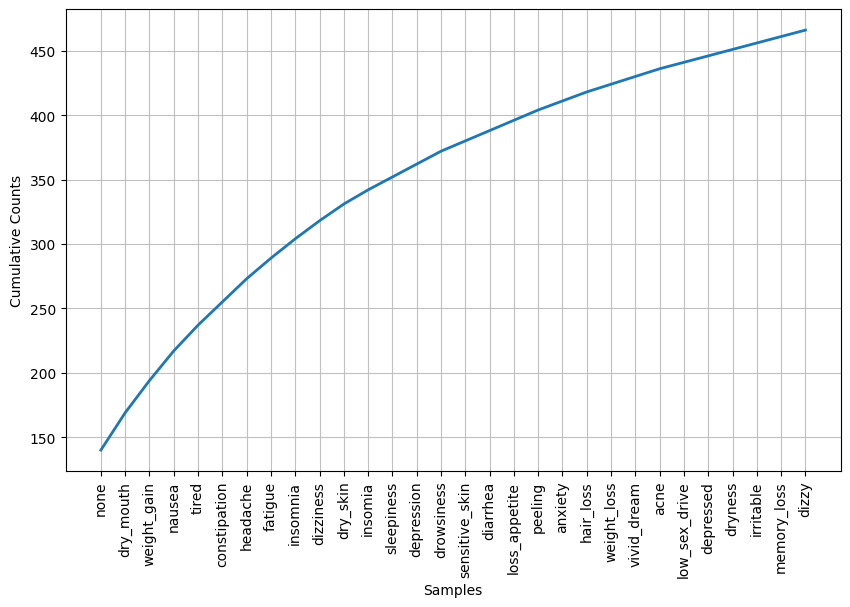

In [ ]:
plt.figure(figsize=(10,6))
fdist.plot(30, cumulative=True)

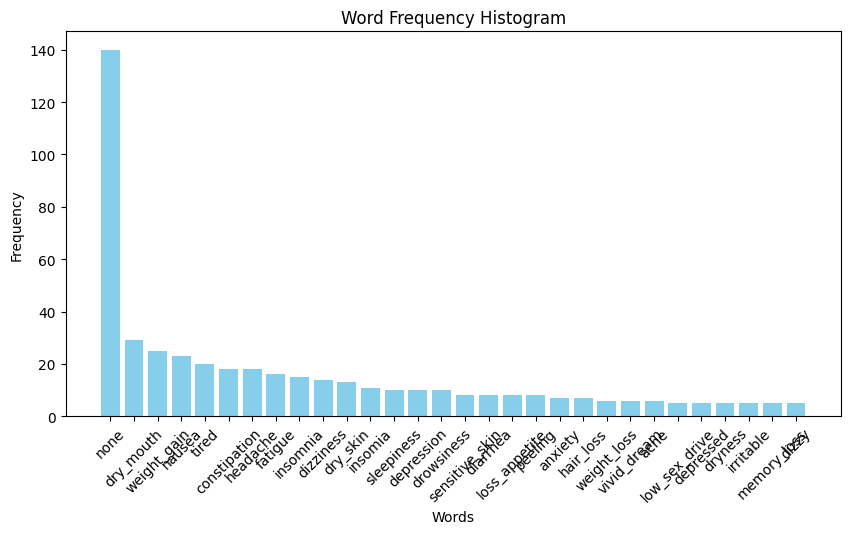

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(words, counts, color="skyblue")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Histogram")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

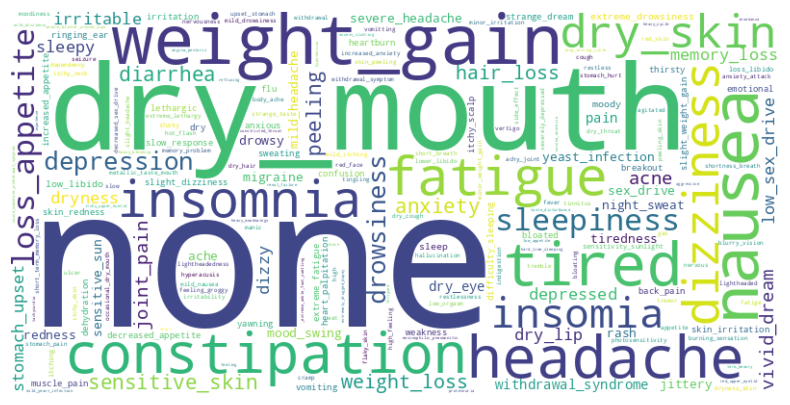

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(all_side_effects))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Perform KMeans for clustering**

In [ ]:
# word_vectors = np.array(train_datadf['ngrams_tokens'].tolist())

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (622,) + inhomogeneous part.

In [ ]:

def get_drug_vector(side_effect_tokens):
  sentence_vector = [model.wv[word] for word in all_side_effects if word in model.wv]
  return np.mean(sentence_vector, axis=0) if sentence_vector else np.zeros(100)

train_datadf['ngrams_embeddings'] = train_datadf['ngrams_tokens'].apply(get_drug_vector)


In [ ]:
train_datadf.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,benefitsArray,sideEffectsReview,sideArray,commentsReview,dosageArray,ngrams_tokens,ngrams_embeddings
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...","monitor blood pressure , weight and asses for ...","[cough, hypotension, proteinuria, impotence, r...","[-0.0005723247, 0.0007058625, 0.0005911134, 0...."
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","heavy cycle, cramps, hot flashes, fatigue, lon...","I Hate This Birth Control, I Would Not Suggest...","I Hate This Birth Control, I Would Not Suggest...","[heavy_cycle, cramp, hot_flash, fatigue, long_...","[-0.0005723247, 0.0007058625, 0.0005911134, 0...."
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,"heavy bleeding, excess clotting",I took 2 pills at the onset of my menstrual cr...,I took 2 pills at the onset of my menstrual cr...,"[heavy_bleeding, excess_clotting]","[-0.0005723247, 0.0007058625, 0.0005911134, 0...."
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...","constipation, dry mouth, mild dizziness",I was given Prilosec prescription at a dose of...,I was given Prilosec prescription at a dose of...,"[constipation, dry_mouth, mild_dizziness]","[-0.0005723247, 0.0007058625, 0.0005911134, 0...."
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,extremely drugged and dopey. extreme ankle and...,See above,See above,[extremely_drugged_dopey._extreme_ankle_foot_s...,"[-0.0005723247, 0.0007058625, 0.0005911134, 0...."


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
num_clusters = 5
word_vectors = np.array(train_datadf['ngrams_embeddings'].tolist())
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(word_vectors)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
pca_model = PCA(n_components=3, random_state=42)
reduction = pca_model.fit_transform(word_vectors)

In [ ]:
len(reduction)

622

In [ ]:
train_datadf['kmeans_analysis'] = kmeans.labels_
centers = kmeans.cluster_centers_
labels = kmeans.labels_
train_datadf.head()

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,benefitsArray,sideEffectsReview,sideArray,commentsReview,dosageArray,ngrams_tokens,ngrams_embeddings,kmeans_analysis
2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ...","monitor blood pressure , weight and asses for ...","[cough, hypotension, proteinuria, impotence, r...","[-0.0005723247, 0.0007058625, 0.0005911134, 0....",0
3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","heavy cycle, cramps, hot flashes, fatigue, lon...","I Hate This Birth Control, I Would Not Suggest...","I Hate This Birth Control, I Would Not Suggest...","[heavy_cycle, cramp, hot_flash, fatigue, long_...","[-0.0005723247, 0.0007058625, 0.0005911134, 0....",0
1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,"heavy bleeding, excess clotting",I took 2 pills at the onset of my menstrual cr...,I took 2 pills at the onset of my menstrual cr...,"[heavy_bleeding, excess_clotting]","[-0.0005723247, 0.0007058625, 0.0005911134, 0....",0
3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...","constipation, dry mouth, mild dizziness",I was given Prilosec prescription at a dose of...,I was given Prilosec prescription at a dose of...,"[constipation, dry_mouth, mild_dizziness]","[-0.0005723247, 0.0007058625, 0.0005911134, 0....",0
1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,extremely drugged and dopey. extreme ankle and...,See above,See above,[extremely_drugged_dopey._extreme_ankle_foot_s...,"[-0.0005723247, 0.0007058625, 0.0005911134, 0....",0


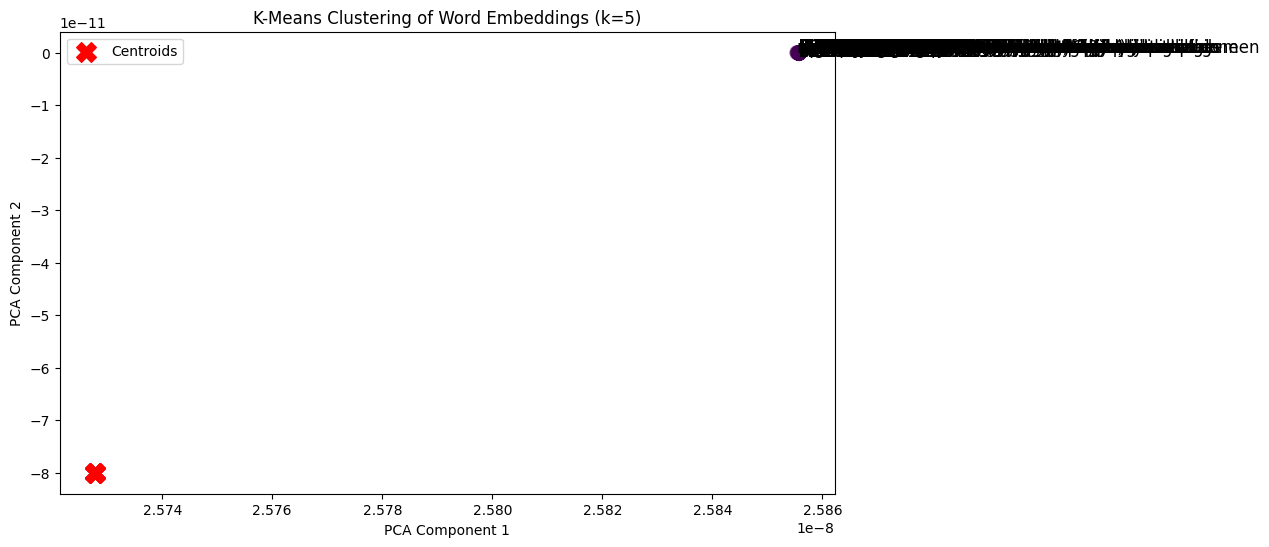

In [ ]:

# Plot K-Means clusters
plt.figure(figsize=(10,6))
scatter = plt.scatter(reduction[:, 0], reduction[:, 1], c=labels, cmap="viridis", s=100, alpha=0.7)

# Annotate words on the plot
for i, word in enumerate(train_datadf['condition']):
    plt.annotate(word, (reduction[i, 0], reduction[i, 1]), fontsize=12)

# Plot cluster centers
centers = pca_model.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200, label="Centroids")

plt.title("K-Means Clustering of Word Embeddings (k=5)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()


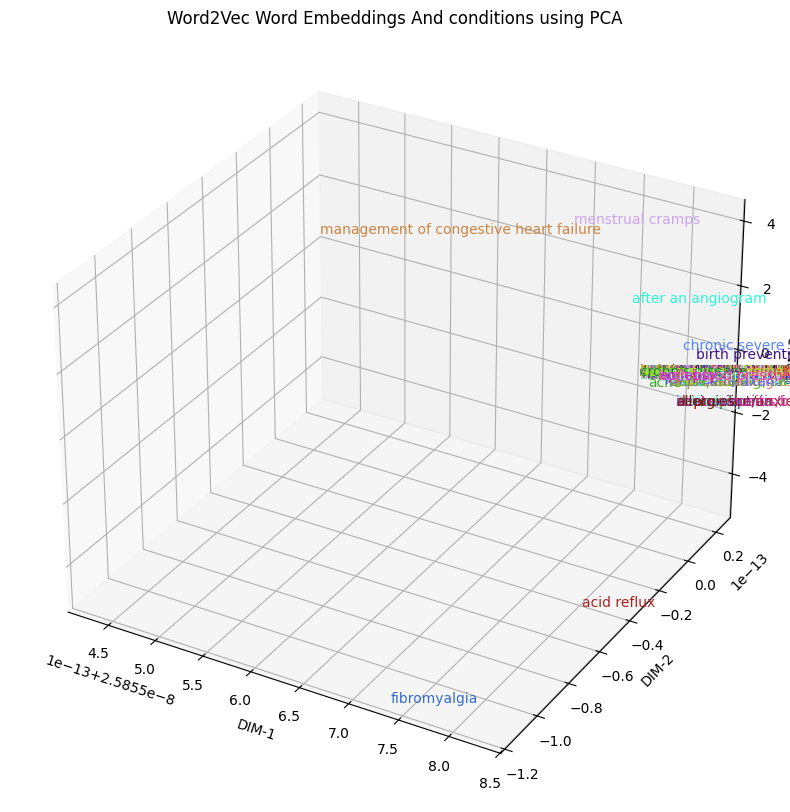

In [ ]:
fig = plt.figure(figsize=(14,10))
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection='3d')
for w, vec in zip(train_datadf['condition'], reduction):
    ax.text(vec[0],vec[1],vec[2], w, color=np.random.rand(3,))
ax.set_xlim(min(reduction[:,0]), max(reduction[:,0]))
ax.set_ylim(min(reduction[:,1]), max(reduction[:,1]))
ax.set_zlim(min(reduction[:,2]), max(reduction[:,2]))
ax.set_xlabel('DIM-1')
ax.set_ylabel('DIM-2')
ax.set_zlabel('DIM-3')
plt.title('Word2Vec Word Embeddings And conditions using PCA')
plt.show()

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis", s=30, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200, label="Centroids")  # Mark centroids
plt.title("K-Means Clustering (k=5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

622